# AVS

Automated Vane Shear

In [1]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [254]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from iodp import utils, avs



In [201]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


# Read AVS .csv files

In [209]:
file = './data/input/AVS/393-U1558F-1H-2W_56_AVS.csv'

# return some metdata
df = avs.read_avs_csv_file(file, mode='data', as_dataframe=False)
print(df)

# return the track metadata and not the data readings
df = avs.read_avs_csv_file(file, mode='metadata', as_dataframe=True)
print(df.head())

# return the data readings
df = avs.read_avs_csv_file(file, mode='data', as_dataframe=True)
df.head()


{'device_no': '32', 'barcode_scan': 'SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5', 'method': 'vane test  FL2', 'operator': '', 'vane': 'A', 'penetration_direction': 'X', 'rotation_rate': '1', 'top_interval': '56'}
  device_no                               barcode_scan          method  \
0        32  SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5  vane test  FL2   
1        32  SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5  vane test  FL2   
2        32  SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5  vane test  FL2   
3        32  SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5  vane test  FL2   
4        32  SHLF11600991,"""393-U1558F-1H-2-W"",W,1.5  vane test  FL2   

  operator vane penetration_direction rotation_rate top_interval   identifier  \
0             A                     X             1           56       speed    
1             A                     X             1           56       torque   
2             A                     X             1           56         left   
3             A    

,device_no,barcode_scan,method,operator,vane,penetration_direction,rotation_rate,top_interval,date,speed [°/sec],torque [Nm],angle [deg],,shear stress [kN/m²]
0,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:36,1.000,0.018,1.520,,4.196
1,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:37,1.000,0.041,2.640,,9.557
2,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:38,1.000,0.049,3.720,,11.421
3,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:39,1.000,0.061,4.960,,14.218
4,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:40,1.000,0.073,6.080,,17.016


# Exploring AVS

In [210]:
file = './data/input/AVS/393-U1558F-1H-2W_56_AVS.csv'

# return the data readings
df = avs.read_avs_csv_file(file, mode='data', as_dataframe=True)
df.head()

,device_no,barcode_scan,method,operator,vane,penetration_direction,rotation_rate,top_interval,date,speed [°/sec],torque [Nm],angle [deg],,shear stress [kN/m²]
0,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:36,1.000,0.018,1.520,,4.196
1,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:37,1.000,0.041,2.640,,9.557
2,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:38,1.000,0.049,3.720,,11.421
3,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:39,1.000,0.061,4.960,,14.218
4,32,"SHLF11600991,""""""393-U1558F-1H-2-W"""",W,1.5",vane test FL2,,A,X,1,56,26/06/2022 16:32:40,1.000,0.073,6.080,,17.016


[0.0042902]
0.0
1


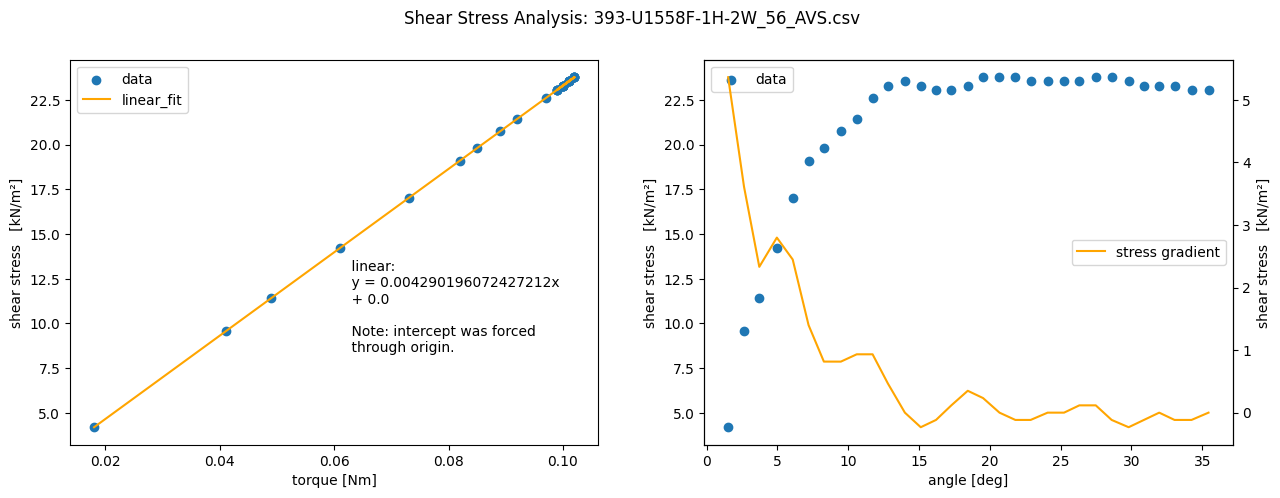

In [262]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

x = 'torque [Nm]'
y = 'shear stress   [kN/m²]'


# regression to see calibration between shear stress and torque
torque = df[x].astype(float).values
shear = df[y].astype(float).values
shear_r = shear.reshape(-1,1)

# Linear Model
model = LinearRegression(fit_intercept=False)

model.fit(
    X = shear_r,
    y = torque
    )

print(model.coef_)
print(model.intercept_)
print(model.rank_)

l_preds = model.predict(shear_r)

linear_eqn = f"""
    y = {model.coef_[0]}x 
    + {model.intercept_}"""

# Plotting

i = 0
axes[i].scatter(
    x=df[x].astype(float),
    y=df[y].astype(float),
    label='data'
)
axes[i].plot(     
            l_preds, 
            shear,   
            label = 'linear_fit',
            color='orange'
)

axes[i].annotate(
    text=f"""
    linear: {linear_eqn}
    
    Note: intercept was forced
    through origin.
    """,
    xy= (0.06,7.5),
    fontsize="10"
)

axes[i].set_xlabel(x)
axes[i].set_ylabel(y)
axes[i].legend()

x = 'angle [deg]'
y = 'shear stress   [kN/m²]'
i = 1
axes[i].scatter(
    x=df[x].astype(float),
    y=df[y].astype(float),
    label='data'
)
axes[i].set_xlabel(x)
axes[i].set_ylabel(y)
axes[i].legend()

# creating a twin axes on the second plot
axes = np.append(axes, axes[i].twinx())

i = 2
axes[i].plot(
    df[x].astype(float),
    np.gradient(df[y].astype(float)),
    color='orange',
    label='stress gradient'
)
axes[i].set_xlabel(x)
axes[i].set_ylabel(y)
axes[i].legend(loc='center right')


fig.suptitle(f'Shear Stress Analysis: {os.path.split(file)[-1]}', fontsize=12)
plt.show()